# Stock Market

In [27]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [28]:
# pip install pmdarima        on anaconda navigilator
from pmdarima.arima import auto_arima



In [30]:
import csv

In [32]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [34]:
data = pd.read_csv('aaba.us',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [35]:
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1996-04-12,1.05,1.79,1.02,1.38,408720000,0
1996-04-15,1.49,1.50,1.25,1.34,79231200,0
1996-04-16,1.34,1.34,1.17,1.20,48026400,0
1996-04-17,1.18,1.18,1.03,1.12,42871200,0
1996-04-18,1.25,1.25,1.17,1.22,27352800,0


In [37]:
data.info

<bound method DataFrame.info of              Open    High    Low  Close     Volume  OpenInt
Date                                                       
1996-04-12   1.05   1.790   1.02   1.38  408720000        0
1996-04-15   1.49   1.500   1.25   1.34   79231200        0
1996-04-16   1.34   1.340   1.17   1.20   48026400        0
1996-04-17   1.18   1.180   1.03   1.12   42871200        0
1996-04-18   1.25   1.250   1.17   1.22   27352800        0
...           ...     ...    ...    ...        ...      ...
2017-11-06  70.27  71.960  70.27  71.71    7129828        0
2017-11-07  72.20  72.470  71.62  72.22    9161521        0
2017-11-08  72.00  72.200  71.09  71.16    7363365        0
2017-11-09  70.46  70.680  68.77  70.19   10054663        0
2017-11-10  70.60  70.745  69.94  70.56    4439900        0

[5434 rows x 6 columns]>

In [38]:
 # Visualize the per day closing price of the stock

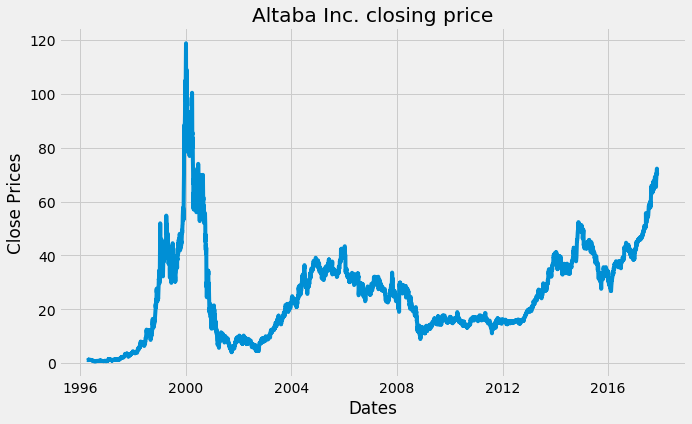

In [39]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

In [41]:
# Scatter Plot

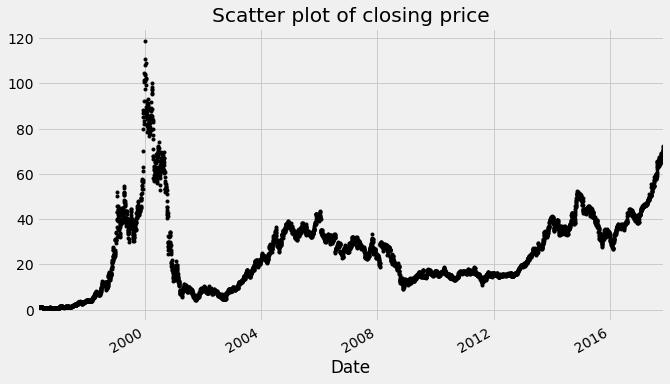

In [40]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [43]:
#Time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

#These components are defined as follows:

#Level: The average value in the series.
#Trend: The increasing or decreasing value in the series.
#Seasonality: The repeating short-term cycle in the series.
#Noise: The random variation in the series.

In [44]:
#ADF (Augmented Dickey-Fuller) Test

#The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

#Null Hypothesis: The series has a unit root (value of a =1)

#Alternate Hypothesis: The series has no unit root.

#If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

#If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

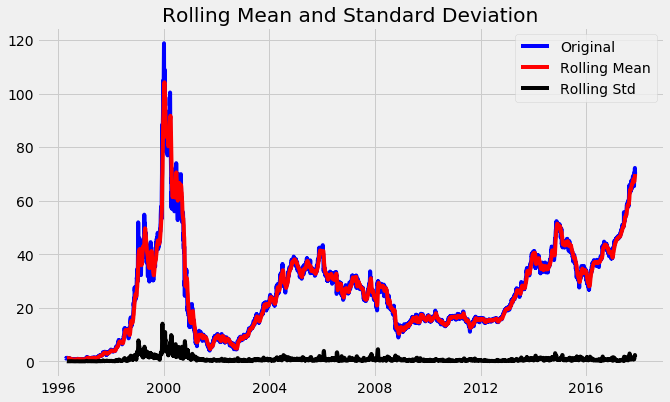

Results of dickey fuller test
Test Statistics                  -2.062280
p-value                           0.259950
No. of lags used                 32.000000
Number of observations used    5401.000000
critical value (1%)              -3.431561
critical value (5%)              -2.862075
critical value (10%)             -2.567055
dtype: float64


In [54]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)


In [55]:
#Through the above graph, we can see the increasing mean 
#and standard deviation and hence our series is not stationary.

In [56]:
 #p-value is greater than 0.05 so we cannot reject the Null hypothesis.
#Also, the test statistics is greater than the critical values. so the data is non-stationary

In [57]:
#In order to perform a time series analysis, we may need to separate seasonality and trend from our series. 
#The resultant series will become stationary through this process.

#So let us separate Trend and Seasonality from the time series

<Figure size 720x432 with 0 Axes>

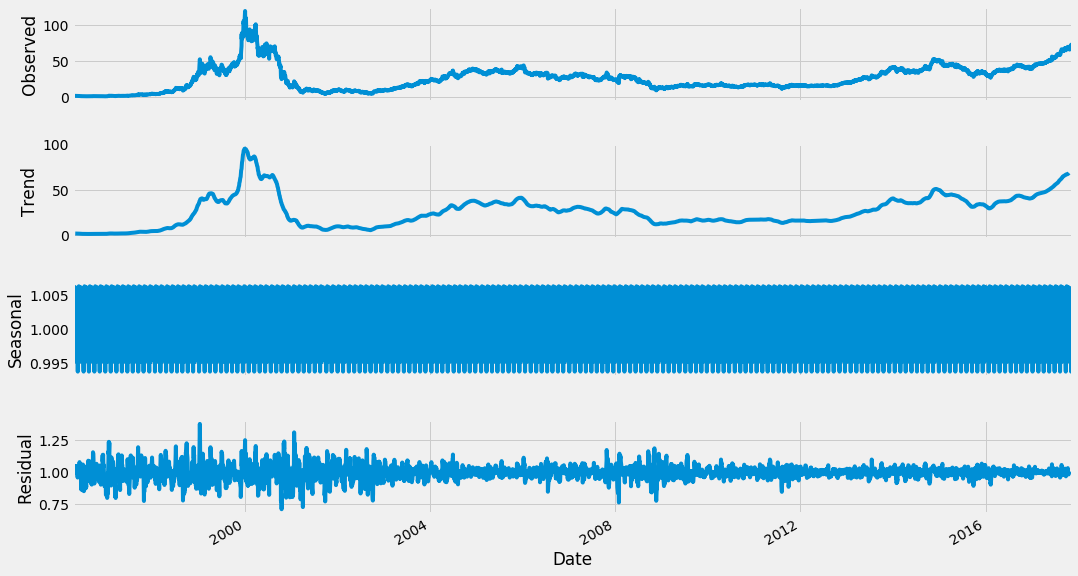

In [58]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [59]:
#we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. 
#Then after getting the log of the series, we find the rolling average of the series. 
#A rolling average is calculated by taking input for 
#the past 12 months and giving a mean consumption value at every point further ahead in series.

In [60]:
from pylab import rcParams


No handles with labels found to put in legend.


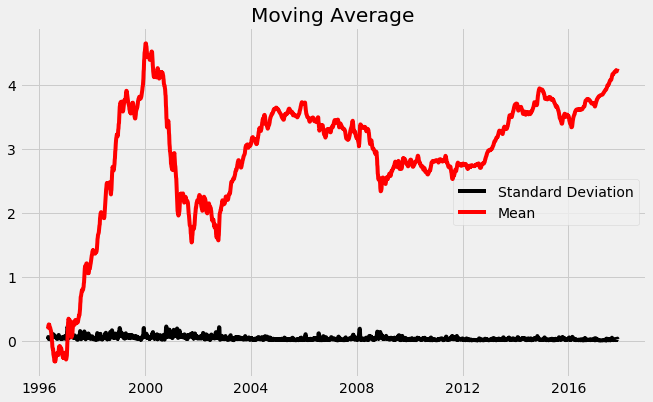

In [61]:
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [62]:
#create an ARIMA model and will train it with the closing price of the stock on the train data.
#So let us split the data into training and test set and visualize it.

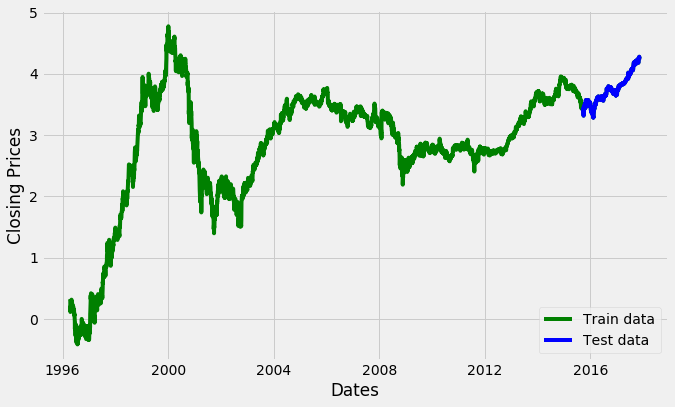

In [63]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [64]:
#Auto ARIMA: Automatically discover the optimal order for an ARIMA model.
#The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, 
#and returns a fitted ARIMA model. This function is based on the commonly-used R function, 
#forecast::auto.arima.
#The auro_arima function works by conducting differencing tests 
#(i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) 
#to determine the order of differencing, d, and then fitting models within ranges of defined 
#start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to 
#identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the 
#optimal order of seasonal differencing, D.

In [72]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-18377.184, BIC=-18364.196, Fit time=1.964 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-18375.274, BIC=-18355.791, Fit time=2.653 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-18375.280, BIC=-18355.798, Fit time=3.540 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-18377.513, BIC=-18371.019, Fit time=0.623 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-18378.090, BIC=-18352.114, Fit time=4.045 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-18386.172, BIC=-18353.702, Fit time=5.592 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-18386.124, BIC=-18360.147, Fit time=1.471 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-18384.395, BIC=-18345.431, Fit time=12.577 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=-18384.593, BIC=-18345.628, Fit time=5.045 seconds


In [73]:
#Residual plots from auto ARIMA.

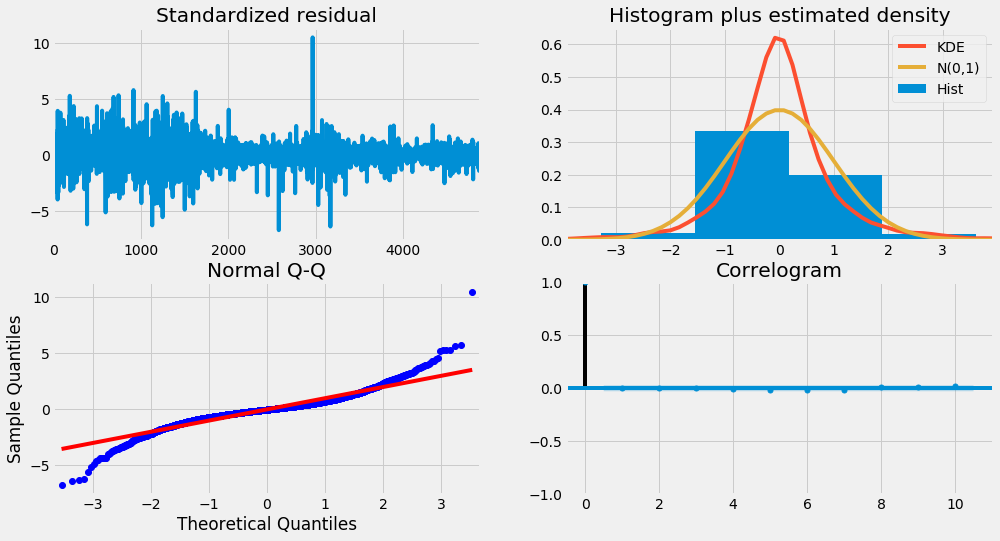

In [74]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [75]:
#Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

#Top Right: The density plot suggest normal distribution with mean zero.

#Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

#Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

#Overall, it seems to be a good fit. Let’s start forecasting the stock prices

In [76]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4886
Model:                 ARIMA(3, 1, 2)   Log Likelihood                9199.505
Method:                       css-mle   S.D. of innovations              0.037
Date:                Thu, 16 Jan 2020   AIC                         -18385.011
Time:                        18:57:03   BIC                         -18339.552
Sample:                             1   HQIC                        -18369.059
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.001      0.630      0.529      -0.001       0.001
ar.L1.D.Close    -1.5825      0.128    -12.380      0.000      -1.833      -1.332
ar.L2.D.Close    -0.8600      0.165     

In [77]:
#Forecast the stock prices on the test dataset keeping 95% confidence level

NameError: name 'fc_series' is not defined

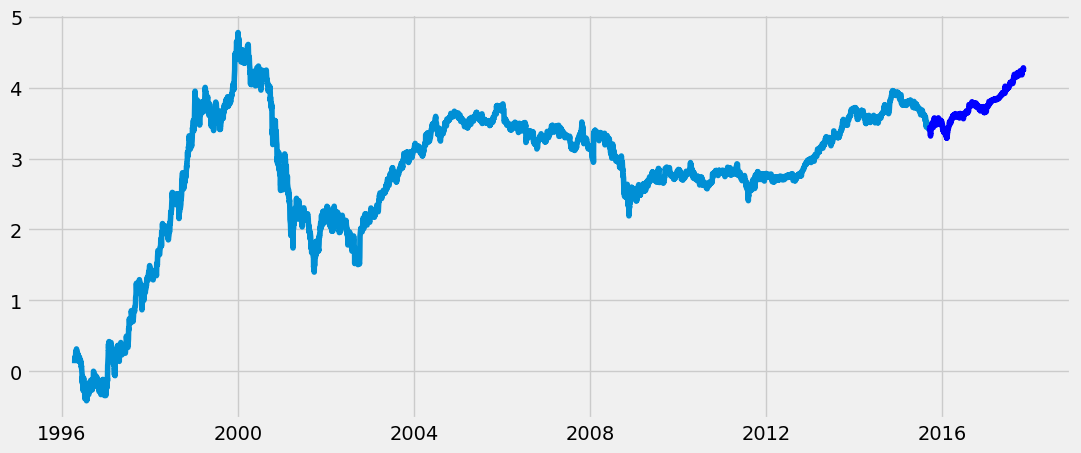

In [83]:
# Forecast
fc, se, conf = fitted.forecast(544, alpha=0.05)  
confidencefc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5),dpi=100)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [86]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.08185081118755018
MAE: 0.22907007496691129
RMSE: 0.2860958077070515
MAPE: 0.05867665810526651


In [87]:
#Around 3.5% 
#MAPE(Mean Absolute Percentage Error)
#implies the model is about 96.5% accurate in predicting the test set observations